In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['savefig.transparent'] = True
plt.rcParams['axes.grid'] = True

In [158]:
def generate_powers(min_time, max_time, interval):
    times = []
    current_time = min_time
    while current_time <= max_time:
        times.append(math.ceil(current_time))
        current_time += interval
    return times

def find_closest(target, lst):
    lst_below_target = [x for x in lst if x <= target]
    return max(lst_below_target)

In [159]:
dfMaxN = pd.read_csv("merged_observed_predicted_mobnet_new.csv")
maxN = dfMaxN[dfMaxN['powermode'] == '12_2201600_1300500000_3199000000']
maxN
# df1 = pd.read_csv("yolo_50_pareto.csv") #Analytical 
df1 = pd.read_csv("mobnet_resnet_TL_curvefit_pareto_powermodes_pred_new.csv")
df2 = pd.read_csv("pareto_powermodes_obs_mobnet.csv") #TL Prediction
data = pd.read_csv("pareto_errors_mobnet.csv") #TL Prediction Errors
df_ran1 = pd.read_csv("mobnet_50_pareto1.csv") #Random
df_nn = pd.read_csv("mobnet_pareto_powermodes_pred_new.csv") #NN Prediction

In [160]:
maxNTime = maxN['observed_time'].values[0]
maxNPower = maxN['observed_power'].values[0]
maxNTime = maxNTime/1000
maxNTime

139.32630998229982

In [161]:
df2 = df2[["powermode","observed_time","observed_power"]]

In [162]:
min_power = math.ceil(min(df1["observed_power"])) #14
max_power = math.floor(max(df1["observed_power"])) #43

In [163]:
max_power

18

In [164]:
min_power

15

In [165]:
power_int_lst = generate_powers(17,50,1)
#resnet 17:50 (offset = 2)
#mobnet 16:50 (offset = 1)
#yolo 15:50 (offset = 0)



In [166]:
len(power_int_lst)

34

In [167]:
t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_anal = [] # p11-t 
p_anal_per = [] # (p11-t)/t
t_anal = []
t_anal_per = []

# t_anal = [] # pred_time - gnd_time
# t_tl_per = [] # (pred_time - gnd_time)/gnd_time

p_ran1 = []
p_ran_per1 = []
t_ran1 = []
t_ran_per1 = []


p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []

p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []


# obs_pwd_lst = []
for i in power_int_lst:
    closest_obs = find_closest(i,df2['observed_power'])
    
#     print(closest_obs)
    obs_pwd = df2[df2['observed_power'] == closest_obs]['powermode'].values[0]
    closest_obs_time = df2[df2['observed_power'] == closest_obs]['observed_time'].values[0]

    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df1['observed_power'])
    obs_pwd = df1[df1['observed_power'] == closest_pred]['powermode'].values[0]
    p_anal.append((closest_pred-i))
    p_anal_per.append((closest_pred-i)/i*100)
    t11.append(closest_pred-closest_obs)
    t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df1[df1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_anal.append(pred_time-closest_obs_time)
    t_anal_per.append((pred_time-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_ran1['observed_power'])
    obs_pwd = df_ran1[df_ran1['observed_power'] == closest_pred]['powermode'].values[0]

    p_ran1.append(closest_pred-i)
    p_ran_per1.append((closest_pred-i)/i*100)
    pred_time = df_ran1[df_ran1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_ran1.append(pred_time-closest_obs_time)
    t_ran_per1.append((pred_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_nn['predicted_power'])
    obs_pwd = df_nn[df_nn['predicted_power'] == closest_pred]['powermode'].values[0]
    closest_obs = df_nn[df_nn['powermode']==obs_pwd]['observed_power'].values[0]
    p_nn.append((closest_obs-i))
    p_nn_per.append((closest_obs-i)/i*100)
    # t11.append(closest_pred-closest_obs)
    # t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df_nn[df_nn['predicted_power'] == closest_pred]['observed_time'].values[0]
    t_nn.append(pred_time-closest_obs_time)
    t_nn_per.append((pred_time-closest_obs_time)/closest_obs_time*100)


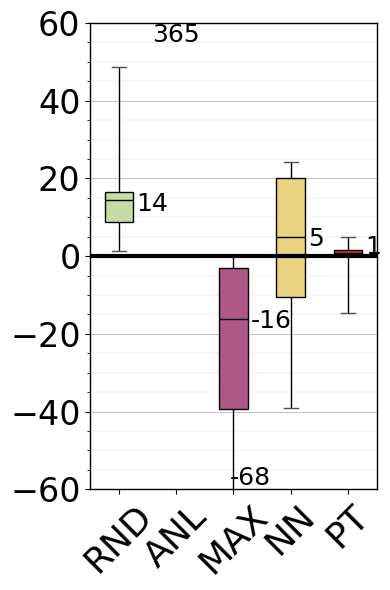

In [168]:
import seaborn as sns
datalist = [t_ran_per1,  t_anal_per, t_maxn_per, t_nn_per,  data['Error4']]
labels = ['RND',  'ANL', 'MAX','NN',  'PT']

fig, ax = plt.subplots(figsize=(4, 6))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k')    # change color

colors = ['#c7e59b', '#fb9a3c', '#be4986', '#fadc6f', '#fc0f13']
sns.boxplot(data=datalist, 
            palette=colors,
            width=0.5, 
            whis=(0, 100), 
            whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))
ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(labels)
# ax.set_ylabel('Time Penalty (%)', fontsize=24)
ax.set_ylim(-60, 60)  # Clip the y-axis to 100
# Increase font size of tick labels
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)
ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()
max_value = -68
ax.text(labels.index('MAX')+0.3, -57, f'{max_value}', ha='center', va='center', fontsize=18)
medians = [int(round(np.median(x))) for x in datalist]
anl_median = medians[1]
medians[1] = ""
ax.text(labels.index('ANL'), 57, f'{anl_median}', ha='center', va='center', fontsize=18, color='black')
median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

median_postions[4] = 3
# Add horizontal line at y=0
ax.axhline(y=0, linewidth=3, color='black')

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')

ax.set_axisbelow(True)
plt.tight_layout()
# plt.axhline(y=0, linewidth=2.5, color='k')
plt.savefig('timePenalty_Mobnet.pdf', dpi=600, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [169]:
dfMaxN = pd.read_csv("merged_observed_predicted_resnet_new.csv")
maxN = dfMaxN[dfMaxN['powermode'] == '12_2201600_1300500000_3199000000']
maxN
# df1 = pd.read_csv("yolo_50_pareto.csv") #Analytical 
df1 = pd.read_csv("resnet_resnet_TL_curvefit_pareto_powermodes_pred_new.csv")
df2 = pd.read_csv("pareto_powermodes_obs_resnet.csv") #TL Prediction
data = pd.read_csv("pareto_errors_resnet.csv") #TL Prediction Errors
df_ran1 = pd.read_csv("resnet_50_pareto1.csv") #Random
df_nn = pd.read_csv("resnet_pareto_powermodes_pred_new.csv") #NN Prediction

maxNTime = maxN['observed_time'].values[0]
maxNPower = maxN['observed_power'].values[0]
maxNTime = maxNTime/1000
maxNTime

df2 = df2[["powermode","observed_time","observed_power"]]

power_int_lst = generate_powers(17,50,1)

t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_anal = [] # p11-t 
p_anal_per = [] # (p11-t)/t
t_anal = []
t_anal_per = []

# t_anal = [] # pred_time - gnd_time
# t_tl_per = [] # (pred_time - gnd_time)/gnd_time

p_ran1 = []
p_ran_per1 = []
t_ran1 = []
t_ran_per1 = []


p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []

p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []


# obs_pwd_lst = []
for i in power_int_lst:
    closest_obs = find_closest(i,df2['observed_power'])
    
#     print(closest_obs)
    obs_pwd = df2[df2['observed_power'] == closest_obs]['powermode'].values[0]
    closest_obs_time = df2[df2['observed_power'] == closest_obs]['observed_time'].values[0]

    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df1['observed_power'])
    obs_pwd = df1[df1['observed_power'] == closest_pred]['powermode'].values[0]
    p_anal.append((closest_pred-i))
    p_anal_per.append((closest_pred-i)/i*100)
    t11.append(closest_pred-closest_obs)
    t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df1[df1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_anal.append(pred_time-closest_obs_time)
    t_anal_per.append((pred_time-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_ran1['observed_power'])
    obs_pwd = df_ran1[df_ran1['observed_power'] == closest_pred]['powermode'].values[0]

    p_ran1.append(closest_pred-i)
    p_ran_per1.append((closest_pred-i)/i*100)
    pred_time = df_ran1[df_ran1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_ran1.append(pred_time-closest_obs_time)
    t_ran_per1.append((pred_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_nn['predicted_power'])
    obs_pwd = df_nn[df_nn['predicted_power'] == closest_pred]['powermode'].values[0]
    closest_obs = df_nn[df_nn['powermode']==obs_pwd]['observed_power'].values[0]
    p_nn.append((closest_obs-i))
    p_nn_per.append((closest_obs-i)/i*100)
    # t11.append(closest_pred-closest_obs)
    # t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df_nn[df_nn['predicted_power'] == closest_pred]['observed_time'].values[0]
    t_nn.append(pred_time-closest_obs_time)
    t_nn_per.append((pred_time-closest_obs_time)/closest_obs_time*100)


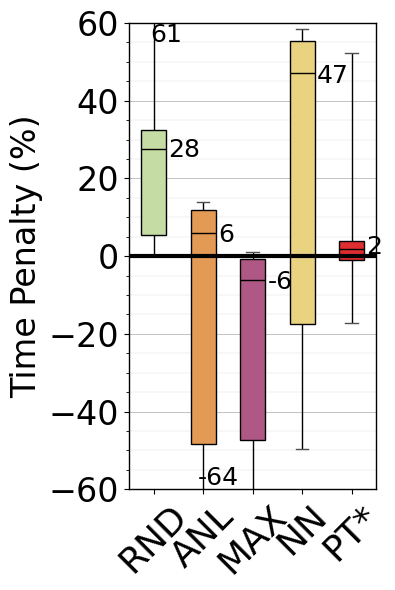

In [170]:
import seaborn as sns


# Create a list of data for each category
datalist = [t_ran_per1,  t_anal_per, t_maxn_per, t_nn_per,  data['Error4']]

# Create a list of labels for each category
labels = ['RND',  'ANL', 'MAX','NN',  'PT*']


fig, ax = plt.subplots(figsize=(4, 6))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k')    # change color
# Create the box plot with whiskers
colors = ['#c7e59b', '#fb9a3c', '#be4986', '#fadc6f', '#fc0f13']
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0, 100), whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))

# sns.boxplot(data=datalist, color=['purple','red','blue','green','orange'], width=0.5, whis=(0,100))  # Adjust the width and whis parameters here

ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(labels)
ax.set_ylabel('Time Penalty (%)', fontsize=24)
# ax.axhline(0, color='black', linewidth=3)  # Add a bold zero line
# 
ax.set_ylim(-60, 60)  # Clip the y-axis to 100
# Increase font size of tick labels
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)



ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()

# Resnet markers

rand_value = 61
ax.text(labels.index('RND')+0.25, +57, f'{rand_value}', ha='center', va='center', fontsize=18)
anal_value = -64
ax.text(labels.index('ANL')+0.3, -57, f'{anal_value}', ha='center', va='center', fontsize=18)

# Mobnet markers
# max_value = -68
# ax.text(labels.index('MAX')+0.3, -57, f'{max_value}', ha='center', va='center', fontsize=12)

# Add text marker for the median of each box plot

medians = [int(round(np.median(x))) for x in datalist]

#mobnet
# anl_median = medians[1]
# medians[1] = ""
# ax.text(labels.index('ANL'), 57, f'{anl_median}', ha='center', va='center', fontsize=12, color='black')
median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

median_postions[4] = 3

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')

ax.axhline(y=0, linewidth=3, color='black')
plt.tight_layout()

plt.savefig('timePenalty_Resnet.pdf', dpi=600, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [171]:
dfMaxN = pd.read_csv("merged_observed_predicted_yolo_new.csv")
maxN = dfMaxN[dfMaxN['powermode'] == '12_2201600_1300500000_3199000000']
maxN
# df1 = pd.read_csv("mobnet_50_pareto.csv") #Analytical 
df1 = pd.read_csv("yolo_resnet_TL_curvefit_pareto_powermodes_pred_new.csv")
df2 = pd.read_csv("yolo_pareto_powermodes_obs_new.csv") #TL Obs
# df_tl = pd.read_csv("pareto_powermodes_obs_yolo.csv") #TL Pred
df_tl = pd.read_csv("yolo_pareto_powermodes_pred_new.csv") #TL Pred
df_ran1 = pd.read_csv("yolo_50_pareto1.csv") #Random
df_nn = pd.read_csv("yolo_NN_pareto_powermodes_pred_new.csv") #NN Prediction

In [172]:
maxNTime = maxN['observed_time'].values[0]
maxNPower = maxN['observed_power'].values[0]
maxNTime = maxNTime/1000
maxNTime

df2 = df2[["powermode","observed_time","observed_power"]]

min_power = math.ceil(min(df1["observed_power"])) #14
max_power = math.floor(max(df1["observed_power"])) #43

power_int_lst = generate_powers(17,50,1)
#resnet 17:50 (offset = 2)
#mobnet 16:50 (offset = 1)
#yolo 15:50 (offset = 0)


t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_anal = [] # p11-t 
p_anal_per = [] # (p11-t)/t
t_anal = []
t_anal_per = []

# t_anal = [] # pred_time - gnd_time
# t_tl_per = [] # (pred_time - gnd_time)/gnd_time

p_ran1 = []
p_ran_per1 = []
t_ran1 = []
t_ran_per1 = []


p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []

p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []

p_tl = []
p_tl_per = []
t_tl = []
t_tl_per = []


# obs_pwd_lst = []
for i in power_int_lst:
    closest_obs = find_closest(i,df2['observed_power'])
    
#     print(closest_obs)
    obs_pwd = df2[df2['observed_power'] == closest_obs]['powermode'].values[0]
    closest_obs_time = df2[df2['observed_power'] == closest_obs]['observed_time'].values[0]

    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df1['observed_power'])
    obs_pwd = df1[df1['observed_power'] == closest_pred]['powermode'].values[0]
    p_anal.append((closest_pred-i))
    p_anal_per.append((closest_pred-i)/i*100)
    t11.append(closest_pred-closest_obs)
    t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df1[df1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_anal.append(pred_time-closest_obs_time)
    t_anal_per.append((pred_time-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_ran1['observed_power'])
    obs_pwd = df_ran1[df_ran1['observed_power'] == closest_pred]['powermode'].values[0]

    p_ran1.append(closest_pred-i)
    p_ran_per1.append((closest_pred-i)/i*100)
    pred_time = df_ran1[df_ran1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_ran1.append(pred_time-closest_obs_time)
    t_ran_per1.append((pred_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_nn['predicted_power'])
    obs_pwd = df_nn[df_nn['predicted_power'] == closest_pred]['powermode'].values[0]
    closest_obs = df_nn[df_nn['powermode']==obs_pwd]['observed_power'].values[0]
    p_nn.append((closest_obs-i))
    p_nn_per.append((closest_obs-i)/i*100)
    # t11.append(closest_pred-closest_obs)
    # t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df_nn[df_nn['predicted_power'] == closest_pred]['observed_time'].values[0]
    t_nn.append(pred_time-closest_obs_time)
    t_nn_per.append((pred_time-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_tl['predicted_power'])
    obs_pwd = df_tl[df_tl['predicted_power'] == closest_pred]['powermode'].values[0]
    closest_obs = df_tl[df_tl['powermode']==obs_pwd]['observed_power'].values[0]
    p_tl.append((closest_obs-i))
    p_tl_per.append((closest_obs-i)/i*100)
    # t11.append(closest_pred-closest_obs)
    # t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df_tl[df_tl['predicted_power'] == closest_pred]['observed_time'].values[0]
    t_tl.append(pred_time-closest_obs_time)
    t_tl_per.append((pred_time-closest_obs_time)/closest_obs_time*100)




In [173]:
# Subtarct every element in power_int_lst with 17
power_int_lst = [x - 17 for x in power_int_lst]


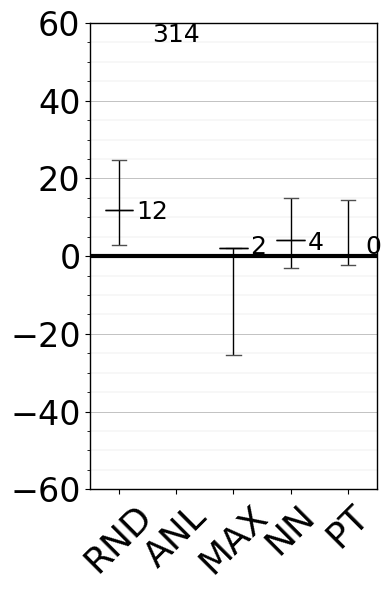

In [174]:
import seaborn as sns


# Create a list of data for each category
datalist = [t_ran_per1,  t_anal_per, t_maxn_per, t_nn_per,  t_tl_per]

# Create a list of labels for each category
labels = ['RND',  'ANL', 'MAX','NN',  'PT']


fig, ax = plt.subplots(figsize=(4, 6))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k')    # change color
# Create the box plot with whiskers
colors = ['#c7e59b', '#fb9a3c', '#be4986', '#fadc6f', '#fc0f13']
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0, 100), 
            whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))

# sns.boxplot(data=datalist, color=['purple','red','blue','green','orange'], width=0.5, whis=(0,100))  # Adjust the width and whis parameters here

ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(labels)
# ax.set_xticks([],[])
# ax.set_ylabel('Time Penalty (%)', fontsize=20)
# ax.set_title('Time Penalty (%)', fontszie=16)

# Set the labels for the x-axis
# plt.xticks(range(len(labels)), labels, fontsize=16)

# ax.minorticks_on()  # Add subgrid lines
# ax.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')  # Add subgrid lines
# ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray')  # Add major gridlines
# add horizontal major and mior gridlines

# ax.axhline(0, color='black', linewidth=3)  # Add a bold zero line

ax.set_ylim(-60, 60)  # Clip the y-axis to 100
# Increase font size of tick labels
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)


ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()

# Resnet markers

# maxn_value = -104.04
# ax.text(labels.index('MAXN'), -55, f'{maxn_value:.2f}', ha='center', va='center', fontsize=10)
# rand_value = 60.61
# ax.text(labels.index('Rand'), +58, f'{rand_value:.2f}', ha='center', va='center', fontsize=10)
# # anal_value = 109.57
# ax.text(labels.index('Anal'), +58, f'{anal_value:.2f}', ha='center', va='center', fontsize=10)

# Add text marker for the median of each box plot

medians = [int(round(np.median(x))) for x in datalist]
median_postions = [int(round(np.median(x))) for x in datalist]

anl_median = medians[1]
medians[1] = ""
ax.text(labels.index('ANL'), 57, f'{anl_median}', ha='center', va='center', fontsize=18, color='black')

median_postions[2] = 3
median_postions[4] = 3

median_postions = [54 if x > 54 else x for x in median_postions]
for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')


# for label in labels:
#     ax.text(labels.index(label), -65, label, ha='center', va='center', fontsize=16, color='black')


# plt.vlines(10, -65, -62, colors='black')
    
# Add a small vertical line to mark the mean of each box plot
ax.axhline(y=0, linewidth=3, color='black')

plt.tight_layout()

plt.savefig('timePenalty_Yolo.pdf', dpi=600, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [175]:
df1 = pd.read_csv("LSTM_pareto_powermodes_obs_new.csv")
df2 = pd.read_csv("LSTM_pareto_powermodes_pred_new.csv")
df3 = pd.read_csv("LSTM_NN_pareto_powermodes_obs_new.csv")
df4 = pd.read_csv("LSTM_NN_pareto_powermodes_pred_new.csv")


maxNTime = 24.17666794
maxNPower = 41.913


power_int_lst = generate_powers(17,50,1)


t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_tl = []
p_tl_per = []
t_tl = []
t_tl_per = []

p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []


for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df1['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df1[df1['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df1[df1['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df2['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df2[df2['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df2[df2['powermode'] == corr_pwd]['observed_power'].values[0]
    p_tl.append((corr_obs-i))
    p_tl_per.append((corr_obs-i)/i*100)
    corr_time = df2[df2['powermode'] == corr_pwd]['observed_time'].values[0]
    t_tl.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_tl_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)


p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []

for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df3['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df3[df3['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df3[df3['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df4['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df4[df4['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df4[df4['powermode'] == corr_pwd]['observed_power'].values[0]
    p_nn.append((corr_obs-i))
    p_nn_per.append((corr_obs-i)/i*100)
    corr_time = df4[df4['powermode'] == corr_pwd]['observed_time'].values[0]
    t_nn.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_nn_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

# Subtarct every element in power_int_lst with 17
power_int_lst = [x - 17 for x in power_int_lst]

p_nn_series = pd.Series(p_nn, index=power_int_lst)
maxn_series = pd.Series(p_maxn, index=power_int_lst)
p_tl_series = pd.Series(p_tl, index=power_int_lst)

# Negative values in the series are made 0
tl_power = [0 if x < 0 else x for x in p_tl_series]
nn_power = [0 if x < 0 else x for x in p_nn_series]
maxn_power = [0 if x < 0 else x for x in maxn_series]

tl_area = np.trapz(tl_power, power_int_lst)
nn_area = np.trapz(nn_power, power_int_lst)
maxn_area = np.trapz(maxn_power, power_int_lst)

print("TL Area: ", tl_area)
print("NN Area: ", nn_area)
print("MAXN Area: ", maxn_area)

# % of zero values in the lists
tl_pos = len([x for x in tl_power if x == 0])/len(tl_power)
nn_pos = len([x for x in nn_power if x == 0])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x == 0])/len(maxn_power)


print("TL %: ", tl_pos)
print("NN %: ", nn_pos)
print("MAXN %: ", maxn_pos)

# % of values under x in the lists
thres = 1
tl_pos = len([x for x in tl_power if x < thres])/len(tl_power)
nn_pos = len([x for x in nn_power if x < thres])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x < thres])/len(maxn_power)

print("TL under "+str(thres)+"W %: ", tl_pos)
print("NN under "+str(thres)+"W %: ", nn_pos)
print("MAXN under "+str(thres)+"W %: ", maxn_pos)





Target:  17
Closest Observed Power:  16.8635
Closest Observed Powermode:  12_1344000_522750000_665600000
Closest Predicted Power:  16.723518
Closest Predicted Powermode:  4_1497600_318750000_665600000
corr_time:  105.49077270507811
closest_obs_time:  99.05108714675904
Target:  18
Closest Observed Power:  17.874
Closest Observed Powermode:  2_1804800_216750000_2133000000
Closest Predicted Power:  17.418566
Closest Predicted Powermode:  8_883200_216750000_3199000000
corr_time:  96.81600309371947
closest_obs_time:  95.45001985549928
Target:  19
Closest Observed Power:  18.476
Closest Observed Powermode:  2_883200_420750000_2133000000
Closest Predicted Power:  18.671275
Closest Predicted Powermode:  2_883200_420750000_2133000000
corr_time:  63.82426257896423
closest_obs_time:  63.82426257896423
Target:  20
Closest Observed Power:  18.476
Closest Observed Powermode:  2_883200_420750000_2133000000
Closest Predicted Power:  18.671275
Closest Predicted Powermode:  2_883200_420750000_2133000000

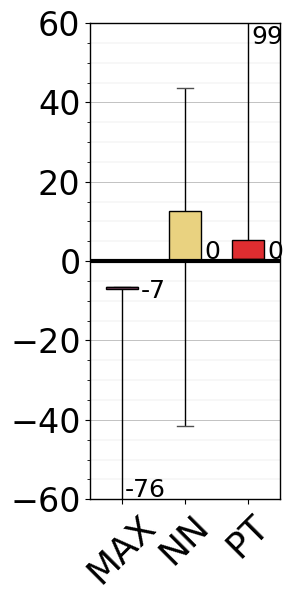

In [176]:
from matplotlib import colors as mcolors
import seaborn as sns



# Create a list of data for each category
datalist = [t_maxn_per, t_nn_per, t_tl_per]


# Create a list of labels for each category
labels = ['MAX', 'NN', 'PT']
colors = ['#be4986', '#fadc6f', '#fc0f13']

fig, ax = plt.subplots(figsize=(3, 6.1))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k')    # change color


# lighter_colors = [mcolors.to_rgba(c, alpha=0.2) for c in colors]
# Create the box plot with whiskers
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0,100), 
            whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))  # Adjust the width and whis parameters here

ax.set_xticks(range(len(datalist)))
ax.set_xticklabels(labels)
# ax.set_ylabel('Time Penalty (%)', fontsize=20)
# ax.set_title('Time Penalty (%)', fontszie=16)

# Set the labels for the x-axis
plt.xticks(range(len(labels)), labels, fontsize=16)



# ax.axhline(0, color='red', linewidth=3)  # Add a bold zero line

ax.set_ylim(-60, 60)  # Clip the y-axis to 100

ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()


tl_value = 99
ax.text(labels.index('PT')+0.05, 57, f'{tl_value}', ha='left', va='center_baseline', fontsize=18)

# nn_value = -60
# ax.text(labels.index('NN'), -57, f'{nn_value:.2f}', ha='center', va='center', fontsize=10)

maxn_value = -76
ax.text(labels.index('MAX')+0.05, -57, f'{maxn_value}', ha='left', va='center_baseline', fontsize=18)

medians = [int(round(np.median(x))) for x in datalist]


median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

median_postions[1] = 3
median_postions[2] = 3

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()
# Set the title for the plot
#plt.title('Time Benefit')
ax.axhline(y=0, linewidth=3, color='black')
plt.tight_layout()
plt.savefig('timePenalty_LSTM.pdf', dpi=600, format='pdf', bbox_inches='tight')


# Show the plot
plt.show()

In [177]:
df1 = pd.read_csv("BERT_pareto_powermodes_obs_new.csv")
df2 = pd.read_csv("BERT_pareto_powermodes_pred_new.csv")
df3 = pd.read_csv("BERT_NN_pareto_powermodes_obs_new.csv")
df4 = pd.read_csv("BERT_NN_pareto_powermodes_pred_new.csv")

maxNTime = 4120.537544
maxNPower = 56.875

power_int_lst = generate_powers(17,50,1)

t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_tl = []
p_tl_per = []
t_tl = []
t_tl_per = []

p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []


for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df1['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df1[df1['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df1[df1['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df2['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df2[df2['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df2[df2['powermode'] == corr_pwd]['observed_power'].values[0]
    p_tl.append((corr_obs-i))
    p_tl_per.append((corr_obs-i)/i*100)
    corr_time = df2[df2['powermode'] == corr_pwd]['observed_time'].values[0]
    t_tl.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_tl_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)


p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []

for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df3['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df3[df3['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df3[df3['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df4['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df4[df4['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df4[df4['powermode'] == corr_pwd]['observed_power'].values[0]
    p_nn.append((corr_obs-i))
    p_nn_per.append((corr_obs-i)/i*100)
    corr_time = df4[df4['powermode'] == corr_pwd]['observed_time'].values[0]
    t_nn.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_nn_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

# Subtarct every element in power_int_lst with 17
power_int_lst = [x - 17 for x in power_int_lst]

p_nn_series = pd.Series(p_nn, index=power_int_lst)
maxn_series = pd.Series(p_maxn, index=power_int_lst)
p_tl_series = pd.Series(p_tl, index=power_int_lst)

# Negative values in the series are made 0
tl_power = [0 if x < 0 else x for x in p_tl_series]
nn_power = [0 if x < 0 else x for x in p_nn_series]
maxn_power = [0 if x < 0 else x for x in maxn_series]

tl_area = np.trapz(tl_power, power_int_lst)
nn_area = np.trapz(nn_power, power_int_lst)
maxn_area = np.trapz(maxn_power, power_int_lst)

print("TL Area: ", tl_area)
print("NN Area: ", nn_area)
print("MAXN Area: ", maxn_area)

# % of zero values in the lists
tl_pos = len([x for x in tl_power if x == 0])/len(tl_power)
nn_pos = len([x for x in nn_power if x == 0])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x == 0])/len(maxn_power)

print("TL %: ", tl_pos)
print("NN %: ", nn_pos)
print("MAXN %: ", maxn_pos)

# % of values under x in the lists
thres = 1
tl_pos = len([x for x in tl_power if x < thres])/len(tl_power)
nn_pos = len([x for x in nn_power if x < thres])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x < thres])/len(maxn_power)

print("TL under "+str(thres)+"W %: ", tl_pos)
print("NN under "+str(thres)+"W %: ", nn_pos)
print("MAXN under "+str(thres)+"W %: ", maxn_pos)

Target:  17
Closest Observed Power:  11.338
Closest Observed Powermode:  2_883200_522750000_665600000
Closest Predicted Power:  15.298845
Closest Predicted Powermode:  2_883200_420750000_2133000000
corr_time:  19084.01886523437
closest_obs_time:  18187.03869580078
Target:  18
Closest Observed Power:  11.338
Closest Observed Powermode:  2_883200_522750000_665600000
Closest Predicted Power:  15.298845
Closest Predicted Powermode:  2_883200_420750000_2133000000
corr_time:  19084.01886523437
closest_obs_time:  18187.03869580078
Target:  19
Closest Observed Power:  11.338
Closest Observed Powermode:  2_883200_522750000_665600000
Closest Predicted Power:  15.298845
Closest Predicted Powermode:  2_883200_420750000_2133000000
corr_time:  19084.01886523437
closest_obs_time:  18187.03869580078
Target:  20
Closest Observed Power:  19.682
Closest Observed Powermode:  2_1804800_522750000_665600000
Closest Predicted Power:  15.298845
Closest Predicted Powermode:  2_883200_420750000_2133000000
corr_t

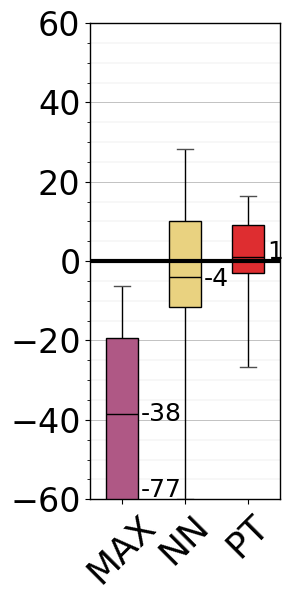

In [178]:
from matplotlib import colors as mcolors
import seaborn as sns



# Create a list of data for each category
datalist = [t_maxn_per, t_nn_per, t_tl_per]


# Create a list of labels for each category
labels = ['MAX', 'NN', 'PT']
colors = ['#be4986', '#fadc6f', '#fc0f13']

fig, ax = plt.subplots(figsize=(3, 6.1))

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k')    # change color


# lighter_colors = [mcolors.to_rgba(c, alpha=0.2) for c in colors]
# Create the box plot with whiskers
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0,100),
            whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))  # Adjust the width and whis parameters here

ax.set_xticks(range(len(datalist)))
ax.set_xticklabels(labels)
# ax.set_ylabel('Time Penalty (%)', fontsize=20)
# ax.set_title('Time Penalty (%)', fontszie=16)

# Set the labels for the x-axis
plt.xticks(range(len(labels)), labels, fontsize=16)



# ax.axhline(0, color='red', linewidth=3)  # Add a bold zero line

ax.set_ylim(-60, 60)  # Clip the y-axis to 100

ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()


# tl_value = 99
# ax.text(labels.index('TL')+0.05, 57, f'{tl_value}', ha='left', va='center_baseline', fontsize=12)

# # nn_value = -60
# # ax.text(labels.index('NN'), -57, f'{nn_value:.2f}', ha='center', va='center', fontsize=10)

maxn_value = -77
ax.text(labels.index('MAX')+0.3, -57, f'{maxn_value}', ha='left', va='center_baseline', fontsize=18)

medians = [int(round(np.median(x))) for x in datalist]


median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

# median_postions[1] = 3
median_postions[2] = 3

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()
# Set the title for the plot
#plt.title('Time Benefit')
ax.axhline(y=0, linewidth=3, color='black')
plt.tight_layout()
plt.savefig('timePenalty_BERT.pdf', dpi=600, format='pdf', bbox_inches='tight')


# Show the plot
plt.show()

In [179]:
df1 = pd.read_csv("Mobnet_IN_pareto_powermodes_obs_new.csv")
df2 = pd.read_csv("Mobnet_IN_pareto_powermodes_pred_new.csv")
df3 = pd.read_csv("Mobnet_IN_NN_pareto_powermodes_obs_new.csv")
df4 = pd.read_csv("Mobnet_IN_NN_pareto_powermodes_pred_new.csv")

maxNTime = 310.09633305358887
maxNPower = 43.188

power_int_lst = generate_powers(17,50,1)

t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_tl = []
p_tl_per = []
t_tl = []
t_tl_per = []

p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []


for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df1['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df1[df1['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df1[df1['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df2['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df2[df2['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df2[df2['powermode'] == corr_pwd]['observed_power'].values[0]
    p_tl.append((corr_obs-i))
    p_tl_per.append((corr_obs-i)/i*100)
    corr_time = df2[df2['powermode'] == corr_pwd]['observed_time'].values[0]
    t_tl.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_tl_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)


p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []

for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df3['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df3[df3['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df3[df3['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df4['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df4[df4['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df4[df4['powermode'] == corr_pwd]['observed_power'].values[0]
    p_nn.append((corr_obs-i))
    p_nn_per.append((corr_obs-i)/i*100)
    corr_time = df4[df4['powermode'] == corr_pwd]['observed_time'].values[0]
    t_nn.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_nn_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

# Subtarct every element in power_int_lst with 17
power_int_lst = [x - 17 for x in power_int_lst]

p_nn_series = pd.Series(p_nn, index=power_int_lst)
maxn_series = pd.Series(p_maxn, index=power_int_lst)
p_tl_series = pd.Series(p_tl, index=power_int_lst)

# Negative values in the series are made 0
tl_power = [0 if x < 0 else x for x in p_tl_series]
nn_power = [0 if x < 0 else x for x in p_nn_series]
maxn_power = [0 if x < 0 else x for x in maxn_series]

tl_area = np.trapz(tl_power, power_int_lst)
nn_area = np.trapz(nn_power, power_int_lst)
maxn_area = np.trapz(maxn_power, power_int_lst)

print("TL Area: ", tl_area)
print("NN Area: ", nn_area)
print("MAXN Area: ", maxn_area)

# % of zero values in the lists
tl_pos = len([x for x in tl_power if x == 0])/len(tl_power)
nn_pos = len([x for x in nn_power if x == 0])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x == 0])/len(maxn_power)

print("TL %: ", tl_pos)
print("NN %: ", nn_pos)
print("MAXN %: ", maxn_pos)

# % of values under x in the lists
thres = 1
tl_pos = len([x for x in tl_power if x < thres])/len(tl_power)
nn_pos = len([x for x in nn_power if x < thres])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x < thres])/len(maxn_power)

print("TL under "+str(thres)+"W %: ", tl_pos)
print("NN under "+str(thres)+"W %: ", nn_pos)
print("MAXN under "+str(thres)+"W %: ", maxn_pos)

Target:  17
Closest Observed Power:  16.223
Closest Observed Powermode:  2_883200_522750000_665600000
Closest Predicted Power:  16.853175999999998
Closest Predicted Powermode:  10_268800_1032750000_665600000
corr_time:  1370.055377807617
closest_obs_time:  1584.908283935547
Target:  18
Closest Observed Power:  17.7335
Closest Observed Powermode:  2_1804800_522750000_665600000
Closest Predicted Power:  16.853175999999998
Closest Predicted Powermode:  10_268800_1032750000_665600000
corr_time:  1370.055377807617
closest_obs_time:  1125.819135223389
Target:  19
Closest Observed Power:  18.238
Closest Observed Powermode:  12_1344000_522750000_665600000
Closest Predicted Power:  18.67652
Closest Predicted Powermode:  10_576000_930750000_665600000
corr_time:  933.1302851257324
closest_obs_time:  1006.1081126708984
Target:  20
Closest Observed Power:  19.647
Closest Observed Powermode:  10_1344000_726750000_665600000
Closest Predicted Power:  19.866678
Closest Predicted Powermode:  4_1958400_4

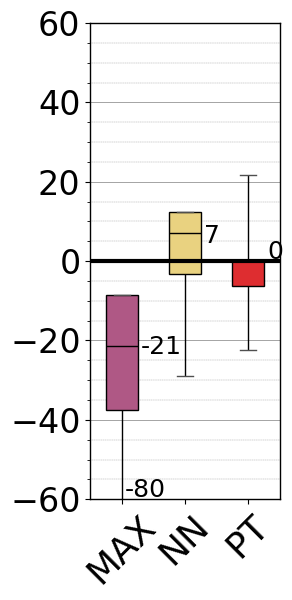

In [180]:
from matplotlib import colors as mcolors
import seaborn as sns



# Create a list of data for each category
datalist = [t_maxn_per, t_nn_per, t_tl_per]


# Create a list of labels for each category
labels = ['MAX', 'NN', 'PT']
colors = ['#be4986', '#fadc6f', '#fc0f13']

fig, ax = plt.subplots(figsize=(3, 6.1))

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k')    # change color


# lighter_colors = [mcolors.to_rgba(c, alpha=0.2) for c in colors]
# Create the box plot with whiskers
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0,100), 
            whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))  # Adjust the width and whis parameters here

ax.set_xticks(range(len(datalist)))
ax.set_xticklabels(labels)
# ax.set_ylabel('Time Penalty (%)', fontsize=20)
# ax.set_title('Time Penalty (%)', fontszie=16)

# Set the labels for the x-axis
plt.xticks(range(len(labels)), labels, fontsize=16)



# ax.axhline(0, color='red', linewidth=3)  # Add a bold zero line

ax.set_ylim(-60, 60)  # Clip the y-axis to 100

ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()


# tl_value = 99
# ax.text(labels.index('TL')+0.05, 57, f'{tl_value}', ha='left', va='center_baseline', fontsize=12)

# nn_value = -60
# ax.text(labels.index('NN'), -57, f'{nn_value:.2f}', ha='center', va='center', fontsize=10)

maxn_value = -80
ax.text(labels.index('MAX')+0.05, -57, f'{maxn_value}', ha='left', va='center_baseline', fontsize=18)

medians = [int(round(np.median(x))) for x in datalist]


median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

# median_postions[1] = 3
median_postions[2] = 3

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.5)
ax.yaxis.grid(which='minor', linestyle='--', linewidth='0.25', color='gray')
ax.minorticks_on()
# Set the title for the plot
#plt.title('Time Benefit')
ax.axhline(y=0, linewidth=3, color='black')
plt.tight_layout()
plt.savefig('timePenalty_Mobnet_IN.pdf', dpi=600, format='pdf', bbox_inches='tight')


# Show the plot
plt.show()

In [181]:
df1 = pd.read_csv("Resnet_GLD_pareto_powermodes_obs_new.csv")
df2 = pd.read_csv("Resnet_GLD_pareto_powermodes_pred_new.csv")
df3 = pd.read_csv("Resnet_GLD_NN_pareto_powermodes_obs_new.csv")
df4 = pd.read_csv("Resnet_GLD_NN_pareto_powermodes_pred_new.csv")

maxNTime = 85.34215952682495
maxNPower = 48.319

power_int_lst = generate_powers(17,50,1)

t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_tl = []
p_tl_per = []
t_tl = []
t_tl_per = []

p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []


for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df1['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df1[df1['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df1[df1['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df2['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df2[df2['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df2[df2['powermode'] == corr_pwd]['observed_power'].values[0]
    p_tl.append((corr_obs-i))
    p_tl_per.append((corr_obs-i)/i*100)
    corr_time = df2[df2['powermode'] == corr_pwd]['observed_time'].values[0]
    t_tl.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_tl_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)


p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []

for i in power_int_lst:
    print("Target: ",i)
    closest_obs = find_closest(i,df3['observed_power'])
    print("Closest Observed Power: ",closest_obs)
#     print(closest_obs)
    obs_pwd = df3[df3['observed_power'] == closest_obs]['powermode'].values[0]
    print("Closest Observed Powermode: ",obs_pwd)
    closest_obs_time = df3[df3['powermode'] == obs_pwd]['observed_time'].values[0]
#     print(closest_obs-i)
#     obs_pwd_lst.append(obs_pwd)
    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df4['predicted_power'])
    print("Closest Predicted Power: ",closest_pred)
    corr_pwd = df4[df4['predicted_power'] == closest_pred]['powermode'].values[0]
    print("Closest Predicted Powermode: ",corr_pwd)
    corr_obs = df4[df4['powermode'] == corr_pwd]['observed_power'].values[0]
    p_nn.append((corr_obs-i))
    p_nn_per.append((corr_obs-i)/i*100)
    corr_time = df4[df4['powermode'] == corr_pwd]['observed_time'].values[0]
    t_nn.append(corr_time-closest_obs_time)
    print("corr_time: ",corr_time)
    print("closest_obs_time: ",closest_obs_time)
    t_nn_per.append((corr_time-closest_obs_time)/closest_obs_time*100)

# Subtarct every element in power_int_lst with 17
power_int_lst = [x - 17 for x in power_int_lst]

p_nn_series = pd.Series(p_nn, index=power_int_lst)
maxn_series = pd.Series(p_maxn, index=power_int_lst)
p_tl_series = pd.Series(p_tl, index=power_int_lst)

# Negative values in the series are made 0
tl_power = [0 if x < 0 else x for x in p_tl_series]
nn_power = [0 if x < 0 else x for x in p_nn_series]
maxn_power = [0 if x < 0 else x for x in maxn_series]

tl_area = np.trapz(tl_power, power_int_lst)
nn_area = np.trapz(nn_power, power_int_lst)
maxn_area = np.trapz(maxn_power, power_int_lst)

print("TL Area: ", tl_area)
print("NN Area: ", nn_area)
print("MAXN Area: ", maxn_area)

# % of zero values in the lists
tl_pos = len([x for x in tl_power if x == 0])/len(tl_power)
nn_pos = len([x for x in nn_power if x == 0])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x == 0])/len(maxn_power)

print("TL %: ", tl_pos)
print("NN %: ", nn_pos)
print("MAXN %: ", maxn_pos)

# % of values under x in the lists
thres = 1
tl_pos = len([x for x in tl_power if x < thres])/len(tl_power)
nn_pos = len([x for x in nn_power if x < thres])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x < thres])/len(maxn_power)

print("TL under "+str(thres)+"W %: ", tl_pos)
print("NN under "+str(thres)+"W %: ", nn_pos)
print("MAXN under "+str(thres)+"W %: ", maxn_pos)

Target:  17
Closest Observed Power:  16.928
Closest Observed Powermode:  6_268800_522750000_665600000
Closest Predicted Power:  16.620116999999997
Closest Predicted Powermode:  4_1497600_318750000_665600000
corr_time:  341.3142310180664
closest_obs_time:  397.2647151184082
Target:  18
Closest Observed Power:  16.928
Closest Observed Powermode:  6_268800_522750000_665600000
Closest Predicted Power:  17.63105
Closest Predicted Powermode:  12_1497600_318750000_665600000
corr_time:  338.29182928466804
closest_obs_time:  397.2647151184082
Target:  19
Closest Observed Power:  18.238
Closest Observed Powermode:  12_1497600_318750000_665600000
Closest Predicted Power:  18.803473
Closest Predicted Powermode:  12_1344000_522750000_665600000
corr_time:  298.99756997680663
closest_obs_time:  338.29182928466804
Target:  20
Closest Observed Power:  19.244
Closest Observed Powermode:  12_1344000_522750000_665600000
Closest Predicted Power:  19.58186
Closest Predicted Powermode:  10_1344000_726750000_

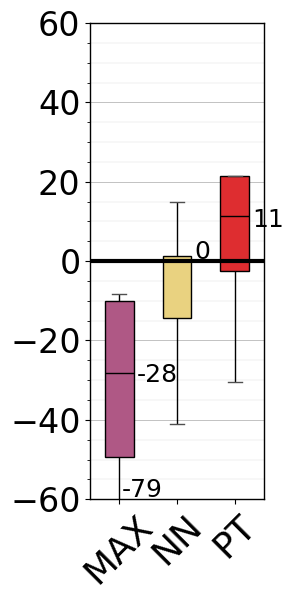

In [182]:
from matplotlib import colors as mcolors
import seaborn as sns



# Create a list of data for each category
datalist = [t_maxn_per, t_nn_per, t_tl_per]


# Create a list of labels for each category
labels = ['MAX', 'NN', 'PT']
colors = ['#be4986', '#fadc6f', '#fc0f13']

fig, ax = plt.subplots(figsize=(3, 6.1))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width
    ax.spines[axis].set_color('k') 


# lighter_colors = [mcolors.to_rgba(c, alpha=0.2) for c in colors]
# Create the box plot with whiskers
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0,100), 
            whiskerprops=dict(color="black", alpha=1), 
            medianprops=dict(color="black", alpha=1),
            boxprops=dict(edgecolor="black"))  # Adjust the width and whis parameters here

ax.set_xticks(range(len(datalist)))
ax.set_xticklabels(labels)
# ax.set_ylabel('Time Penalty (%)', fontsize=20)
# ax.set_title('Time Penalty (%)', fontszie=16)

# Set the labels for the x-axis
plt.xticks(range(len(labels)), labels, fontsize=16)



# ax.axhline(0, color='red', linewidth=3)  # Add a bold zero line

ax.set_ylim(-60, 60)  # Clip the y-axis to 100

ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='y', which='major', labelsize=24)
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()


# tl_value = 99
# ax.text(labels.index('TL')+0.05, 57, f'{tl_value}', ha='left', va='center_baseline', fontsize=12)

# nn_value = -60
# ax.text(labels.index('NN'), -57, f'{nn_value:.2f}', ha='center', va='center', fontsize=10)

maxn_value = -79
ax.text(labels.index('MAX')+0.05, -57, f'{maxn_value}', ha='left', va='center_baseline', fontsize=18)

medians = [int(round(np.median(x))) for x in datalist]


median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

median_postions[1] = 3
# median_postions[2] = 3

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=18, color='black')

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()
# Set the title for the plot
#plt.title('Time Benefit')
ax.axhline(y=0, linewidth=3, color='black')
plt.tight_layout()
plt.savefig('timePenalty_Resnet_GLD.pdf', dpi=600, format='pdf', bbox_inches='tight')


# Show the plot
plt.show()